In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('GOOG.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-29,530.732849,534.013855,528.559814,528.877991,528.877991,2278500
1,2014-12-30,526.644104,529.695740,525.686707,528.967712,528.967712,876200
2,2014-12-31,529.795471,531.141724,524.360352,524.958740,524.958740,1368200
3,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500
4,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800


In [3]:
x = data.iloc[:, 1:2].values

In [4]:
sc = MinMaxScaler(feature_range=(0, 1))
x = sc.fit_transform(x)

In [5]:
x[:10]

array([[0.04302857],
       [0.03832916],
       [0.04195119],
       [0.03938367],
       [0.03279298],
       [0.02332534],
       [0.01415566],
       [0.00382835],
       [0.01158817],
       [0.00033241]])

In [6]:
len(x)

1259

In [7]:
x_train = []
y_train = []
for i in range(25, 1259):
    x_train.append(x[i-25:i, 0])
    y_train.append(x[i, 0])

In [8]:
x_train[0]

array([0.04302857, 0.03832916, 0.04195119, 0.03938367, 0.03279298,
       0.02332534, 0.01415566, 0.00382835, 0.01158817, 0.00033241,
       0.00480261, 0.        , 0.01251658, 0.00614368, 0.01874048,
       0.01444219, 0.03075271, 0.04692567, 0.05029558, 0.04048399,
       0.03224279, 0.01874048, 0.02431103, 0.04250132, 0.03822597])

In [9]:
y_train[0]

0.039647295723679976

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [13]:
model.compile(optimizer='adam',
             loss='mean_squared_error')

In [14]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128)

Train on 1234 samples
Epoch 1/10
1234/1234 [==============================] - 7s 6ms/sample - loss: 0.1000
Epoch 2/10
1234/1234 [==============================] - 1s 870us/sample - loss: 0.0245
Epoch 3/10
1234/1234 [==============================] - 1s 884us/sample - loss: 0.0146
Epoch 4/10
1234/1234 [==============================] - 1s 892us/sample - loss: 0.0097
Epoch 5/10
1234/1234 [==============================] - 1s 926us/sample - loss: 0.0071
Epoch 6/10
1234/1234 [==============================] - 1s 896us/sample - loss: 0.0067
Epoch 7/10
1234/1234 [==============================] - 1s 903us/sample - loss: 0.0058
Epoch 8/10
1234/1234 [==============================] - 1s 900us/sample - loss: 0.0060
Epoch 9/10
1234/1234 [==============================] - 1s 896us/sample - loss: 0.0063
Epoch 10/10
1234/1234 [==============================] - 1s 1ms/sample - loss: 0.0062


In [15]:
predictions = model.predict(x_train)

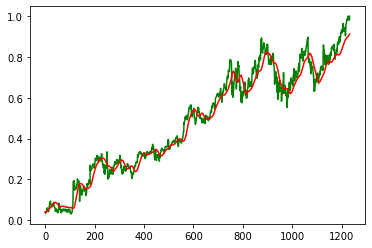

In [16]:
plt.plot(range(len(x_train)), y_train, c='g')
plt.plot(range(len(x_train)), predictions, c='r')